In [1]:
import pandas as pd

# Carreguem les dades des del CSV
# +info: https://analisi.transparenciacatalunya.cat/Medi-Ambient/Quantitat-d-aigua-als-embassaments-de-les-Conques-/gn9e-3qhr/about_data
df = pd.read_csv('data/reservoirs.csv')

df.head()

,Dia,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
0,07/11/2024,Embassament de la Llosa del Cavall (Navès),779.70,33.5,26.79
1,07/11/2024,Embassament de Sau (Vilanova de Sau),397.72,29.8,49.26
2,07/11/2024,Embassament de Foix (Castellet i la Gornal),100.53,100.6,3.76
3,07/11/2024,Embassament de Darnius Boadella (Darnius),136.46,17.9,10.95
4,07/11/2024,Embassament de Siurana (Cornudella de Montsant),458.06,6.9,0.84


In [2]:
# Filtrem registres només del 2023
df['Dia'] = pd.to_datetime(df['Dia'], dayfirst=True)
df_2023 = df[df['Dia'].dt.year == 2023]
df_2023.head()

,Dia,Estació,Nivell absolut (msnm),Percentatge volum embassat (%),Volum embassat (hm3)
2802,2023-12-31,Embassament de Darnius Boadella (Darnius),133.47,13.0,7.96
2803,2023-12-31,Embassament de Siurana (Cornudella de Montsant),454.39,3.5,0.43
2804,2023-12-31,Embassament de Riudecanyes,195.13,3.2,0.17
2805,2023-12-31,Embassament de Sau (Vilanova de Sau),380.85,8.0,13.15
2806,2023-12-31,Embassament de la Baells (Cercs),593.56,22.2,24.35


In [3]:
# Agrupem per estació i mes fent la mitjana de percentual per a cada mes
df_2023['Month'] = df_2023['Dia'].dt.month
monthly_mean = df_2023.groupby(['Estació', 'Month'])['Percentatge volum embassat (%)'].mean().reset_index()
monthly_mean.head()

C:\Users\Pau\AppData\Local\Temp\ipykernel_57176\2774600967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['Dia'].dt.month


,Estació,Month,Percentatge volum embassat (%)
0,Embassament de Darnius Boadella (Darnius),1,31.225806
1,Embassament de Darnius Boadella (Darnius),2,30.753571
2,Embassament de Darnius Boadella (Darnius),3,30.464516
3,Embassament de Darnius Boadella (Darnius),4,29.526667
4,Embassament de Darnius Boadella (Darnius),5,28.296774


In [4]:
# Pivotem la taula posant els mesos com a columnes i mantenint l'embassament com a fila. Finalment reanomenem les columnes.
pivot_df = monthly_mean.pivot(index='Estació', columns='Month', values='Percentatge volum embassat (%)')
pivot_df.columns = [
    "Gener",
    "Febrer",
    "Març",
    "Abril",
    "Maig",
    "Juny",
    "Juliol",
    "Agost",
    "Setembre",
    "Octubre",
    "Novembre",
    "Desembre",
]
pivot_df = pivot_df.reset_index()
pivot_df

,Estació,Gener,Febrer,Març,Abril,Maig,Juny,Juliol,Agost,Setembre,Octubre,Novembre,Desembre
0,Embassament de Darnius Boadella (Darnius),31.225806,30.753571,30.464516,29.526667,28.296774,27.093333,23.212903,18.774194,16.880000,15.529032,14.413333,13.587097
1,Embassament de Foix (Castellet i la Gornal),71.812903,72.921429,75.512903,71.213333,65.635484,61.923333,55.787097,50.351613,50.933333,53.229032,54.063333,53.848387
2,Embassament de Riudecanyes,12.432258,9.853571,8.680645,8.166667,7.435484,6.736667,5.748387,4.964516,4.746667,4.377419,3.893333,3.438710
3,Embassament de Sant Ponç (Clariana de Cardener),45.348387,41.839286,38.258065,32.160000,28.887097,35.456667,39.022581,36.887097,32.563333,26.267742,26.966667,27.935484
4,Embassament de Sau (Vilanova de Sau),18.935484,16.925000,9.474194,6.713333,10.364516,25.493333,28.509677,20.945161,19.043333,16.932258,16.076667,10.790323
5,Embassament de Siurana (Cornudella de Montsant),7.761290,7.771429,7.664516,7.310000,6.909677,6.666667,6.132258,5.370968,4.700000,4.367742,4.060000,3.700000
6,Embassament de Susqueda (Osor),38.990323,36.171429,39.345161,39.270000,36.393548,31.816667,29.187097,26.270968,23.236667,21.341935,18.286667,19.377419
7,Embassament de la Baells (Cercs),28.019355,26.671429,26.012903,25.726667,25.622581,31.810000,36.832258,33.596774,29.610000,26.064516,24.350000,22.877419
8,Embassament de la Llosa del Cavall (Navès),27.216129,26.467857,25.996774,24.786667,22.096774,24.173333,26.016129,24.812903,22.966667,20.822581,19.270000,18.087097


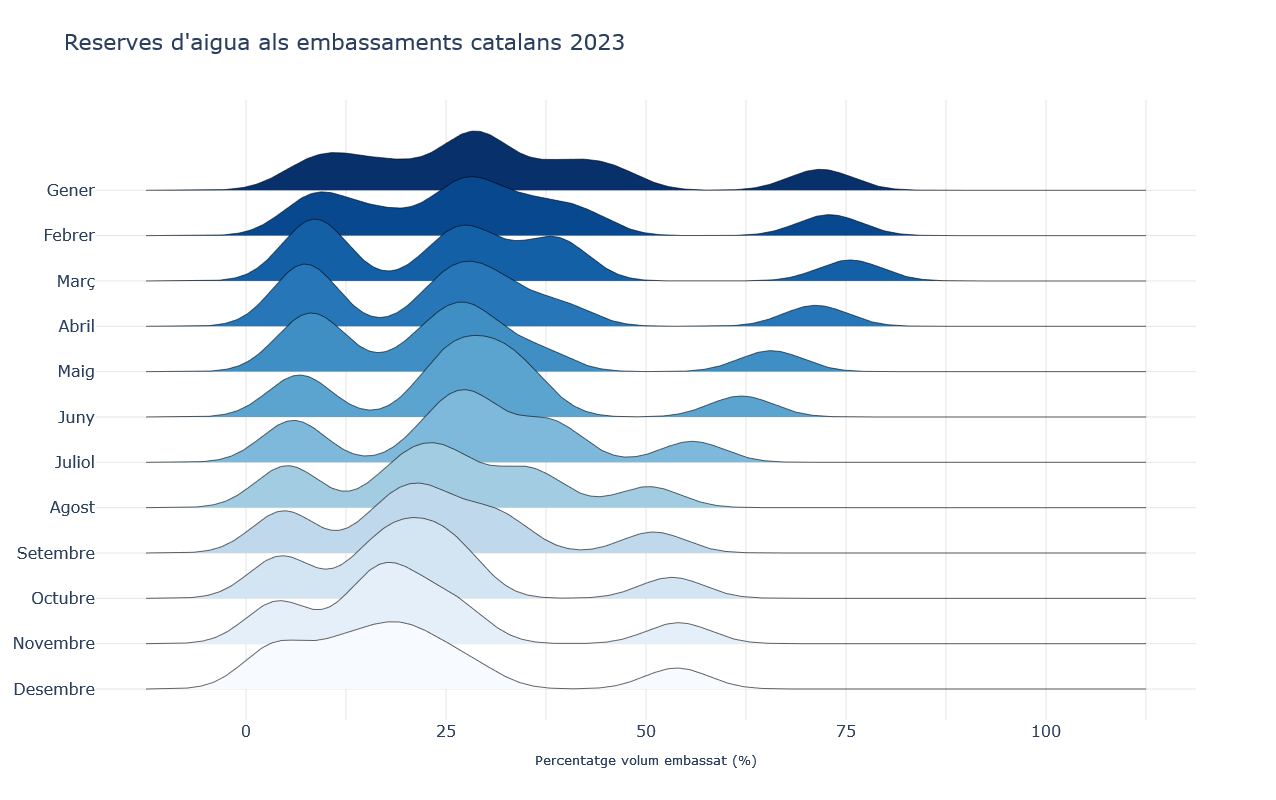

In [7]:
# Realitzem la visualització
from ridgeplot import ridgeplot
import numpy as np

clean_data = pivot_df
column_names = [
    "Gener",
    "Febrer",
    "Març",
    "Abril",
    "Maig",
    "Juny",
    "Juliol",
    "Agost",
    "Setembre",
    "Octubre",
    "Novembre",
    "Desembre",
]
clean_data = clean_data[column_names]

fig = ridgeplot(
    samples=clean_data.to_numpy().T,
    bandwidth=4,
    kde_points=np.linspace(-12.5, 112.5, 500),
    colorscale="blues",
    colormode="row-index",
    labels=column_names,
    spacing=5 / 9,
)

fig.update_layout(
    height=800,
    width=1200,
    font_size=16,
    plot_bgcolor="white",
    xaxis_tickvals=[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5],
    xaxis_ticktext=["0", "", "25", "", "50", "", "75", "", "100", ""],
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title=dict(text="Percentatge volum embassat (%)", font_size=13),
    showlegend=False,
    title="Reserves d'aigua als embassaments catalans 2023"
)

fig.show()

In [8]:
# Exportem
fig.write_html("results/ridgeplot.html")